In [3]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import numpy as np  # or from numpy import array if you prefer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import*
from tensorflow.keras.layers import*
from tensorflow.keras.optimizers import*
from tensorflow.keras.callbacks import*
from tensorflow.keras.preprocessing.image import*
from tensorflow.keras import backend as k
# The typo was in the module name. Changed 'matrics' to 'metrics'
from tensorflow.keras.metrics import MeanIoU, Accuracy # Changed 'MeanIou' to 'MeanIoU' for consistency.

from sklearn.metrics import * # Changed 'matrics' to 'metrics' here as well for consistency.

In [4]:
from numpy import array

def split_sequnce(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

n_steps = 3
X, y = split_sequnce(raw_seq, n_steps)
print(X.shape, y.shape)

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
#define 1D CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X,y,epochs=100,verbose=0)

x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)



(6, 3) (6,)
[[109.28163]]


In [6]:
from numpy import array
from numpy import hstack

def split_sequnce(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        # The original line was trying to access a 3D element in a 2D array.
        # This is changed to correctly access the 2D array 'sequence'.
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

in_seq1 = [10, 20, 30, 40, 50, 60, 70, 80, 90]
in_seq2 = [15, 25, 35, 45, 55, 65, 75,85,95]
out_seq = [in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))]

in_seq1 = array(in_seq1).reshape((len(in_seq1), 1))
in_seq2 = array(in_seq2).reshape((len(in_seq2), 1))
out_seq = array(out_seq).reshape((len(out_seq), 1))

dataset = hstack((in_seq1, in_seq2, out_seq))

n_steps = 3
X, y = split_sequnce(dataset, n_steps)
print(X.shape, y.shape)

n_features = X.shape[2]
print(n_features)

model=Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X,y,epochs=100,verbose=0)
x_input = array([[80, 85], [90, 95], [100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)



(6, 3, 2) (6,)
2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[[240.38484]]


In [16]:
import pandas as pd
df=pd.read_csv('/content/airline-passengers.csv')
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [17]:
df['Month']=pd.to_datetime(df['Month'])
df.index=df['Month']
df = df.drop('Month',axis=1) # Remove inplace=True
data = df['Passengers'].values
data=data.astype('float32')
data=data.reshape(-1,1)


In [18]:
data.shape

(144, 1)

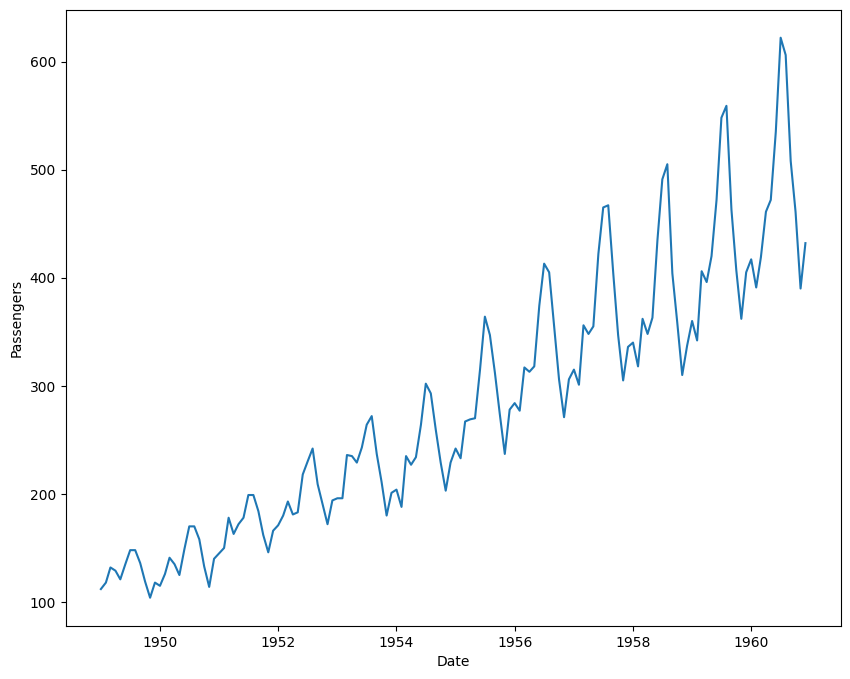

In [19]:
plt.figure(figsize=(10,8))
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

In [22]:
df=pd.DataFrame(data)
print(df.shape)
df.head(),df.tail()

(144, 1)


(       0
 0  112.0
 1  118.0
 2  132.0
 3  129.0
 4  121.0,
          0
 139  606.0
 140  508.0
 141  461.0
 142  390.0
 143  432.0)

In [23]:
def create_sequance(data, seq_len):
  xlist=[]
  ylist=[]
  for i in range(len(data)-seq_len):
    seq=data[i:(i + seq_len)]
    xlist.append(seq)
    ylist.append(data[i+seq_len])
  x_arr=np.array(xlist)
  y_arr=np.array(ylist)
  return x_arr,y_arr


In [24]:
seq_length=12
dataset=np.array(df)
features,lable=create_sequance(dataset,seq_length)
print(features.shape,lable.shape)

(132, 12, 1) (132, 1)


In [27]:
features_df=np.squeeze(features,axis=-1)
features_df=pd.DataFrame(features_df)
label_df=pd.DataFrame(lable)
label_df.columns=['lable']

dataset_df=pd.concat([features_df,label_df],axis=1)
dataset_df

,0,1,2,3,4,5,6,7,8,9,10,11,lable
0,112.0,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0,115.0
1,118.0,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0,115.0,126.0
2,132.0,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0,115.0,126.0,141.0
3,129.0,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0,115.0,126.0,141.0,135.0
4,121.0,135.0,148.0,148.0,136.0,119.0,104.0,118.0,115.0,126.0,141.0,135.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,559.0,463.0,407.0,362.0,405.0,417.0,391.0,419.0,461.0,472.0,535.0,622.0,606.0
128,463.0,407.0,362.0,405.0,417.0,391.0,419.0,461.0,472.0,535.0,622.0,606.0,508.0
129,407.0,362.0,405.0,417.0,391.0,419.0,461.0,472.0,535.0,622.0,606.0,508.0,461.0
130,362.0,405.0,417.0,391.0,419.0,461.0,472.0,535.0,622.0,606.0,508.0,461.0,390.0


In [31]:
from sklearn.preprocessing import MinMaxScaler

rescale=MinMaxScaler(feature_range=(0,1))
norm=rescale.fit_transform(df)
print(norm[-12:])

[[0.6042471 ]
 [0.554054  ]
 [0.60810804]
 [0.6891892 ]
 [0.71042466]
 [0.8320464 ]
 [1.        ]
 [0.96911204]
 [0.7799227 ]
 [0.6891892 ]
 [0.55212355]
 [0.6332046 ]]


In [32]:
#split data to train and test
x,y=create_sequance(norm,seq_length)
print(x.shape,y.shape)
x_train,y_train=x[:120],y[:120]
x_test,y_test=x[-12:],y[-12:]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(132, 12, 1) (132, 1)
(120, 12, 1) (120, 1)
(12, 12, 1) (12, 1)


# **MODEL1: create deep neural network model (functional Method)**

In [35]:
#create deep neural network model (functional Method)
inputs=Input(shape=(seq_length,1))

x=Conv1D(32, kernel_size=(3,), activation='relu')(inputs)
x=MaxPooling1D(pool_size=(2,))(x)

x=Conv1D(64, kernel_size=(3,), activation='relu')(x)
x=MaxPooling1D(pool_size=(2,))(x)

flat=Flatten()(x)

d=Dense(40,activation='relu')(flat)
outputs=Dense(1)(d)

model=Model(inputs=inputs,outputs=outputs)
model.summary()


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 12, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 10, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_7 (MaxPooling1D)       │ (None, 5, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 3, 64)               │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 40)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,977 (35.07 KB)

 Trainable params: 8,977 (35.07 KB)

 Non-trainable params: 0 (0.00 B)

# **MODEL 2: LSTM approach**

In [45]:
inputs=Input(shape=(seq_length,1))
x=LSTM(50,activation='relu')(inputs)

output=Dense(1,activation='relu')(x)
model=Model(inputs=inputs,outputs=output)
model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 12, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(seq_length,1),name='input'))
model.add(Dense(1,name='output'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (LSTM)                         │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#compile and train
model.compile(optimizer='adam',loss='mse')
history=model.fit(x_train,y_train,epochs=100,verbose=1,batch_size=8)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0995
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150 
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129 
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0144 
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0113 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112 
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0078 
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0075 
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0075 
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060 
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss

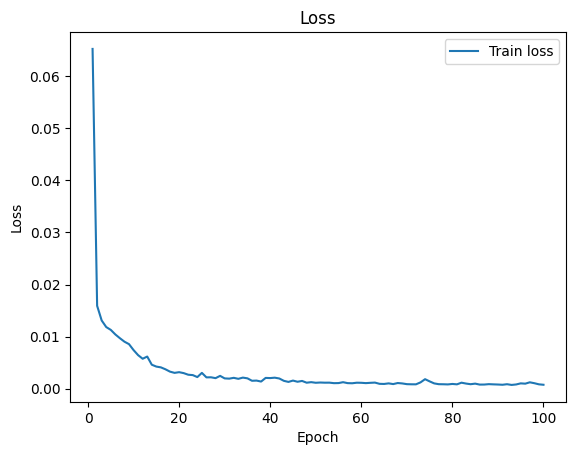

In [37]:
#visualization of loss and accuracy

f,ax=plt.subplots()
ax.plot([None]+ history.history['loss'],label='loss',)
ax.legend(['Train loss'],loc=0)
ax.set_title('Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

In [39]:
#odel evaluation
score=model.evaluate(x_test,y_test,verbose=0)
print('test loss:',score)

test loss: 0.002020491287112236


In [42]:
#model prediction

y_pred=model.predict(x_test)
print('predicted:',y_pred)
print('original',y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
predicted: [[0.5338693 ]
 [0.52951884]
 [0.62508965]
 [0.62741995]
 [0.6688098 ]
 [0.8055475 ]
 [0.9330721 ]
 [0.9568714 ]
 [0.7637349 ]
 [0.67200667]
 [0.63050485]
 [0.60451674]]
original ('original', array([[0.6042471 ],
       [0.554054  ],
       [0.60810804],
       [0.6891892 ],
       [0.71042466],
       [0.8320464 ],
       [1.        ],
       [0.96911204],
       [0.7799227 ],
       [0.6891892 ],
       [0.55212355],
       [0.6332046 ]], dtype=float32))


In [44]:
#rescaling
pred_rescale=rescale.inverse_transform(y_pred)
print('predicted output')
print(pred_rescale)

y_test_rescale=rescale.inverse_transform(y_test[1])
print('original output')
print(y_test_rescale)

predicted output
[[380.54434]
 [378.29074]
 [427.79642]
 [429.0035 ]
 [450.44345]
 [521.27356]
 [587.33136]
 [599.65936]
 [499.6147 ]
 [452.0995 ]
 [430.6015 ]
 [417.13965]]
original output
[[416.99997]
 [390.99997]
 [418.99997]
 [461.     ]
 [471.99997]
 [535.     ]
 [622.     ]
 [606.     ]
 [507.99997]
 [461.     ]
 [390.     ]
 [431.99997]]
